In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import data_processing
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords



In [2]:
phrase_dataframe = data_processing.transcript_to_dataframe('total_dataset.txt')

# Should be of shape (N, 1), N is the number of phrases which will vary by dataset
# For example: HLG is ~175,000
print(f'The dataframe shape is {phrase_dataframe.shape}')


The dataframe shape is (174549, 1)


In [3]:
# In many cases each episode shares the same intro or ad read that will throw off
# our analysis. For example: Podcasts that use anchor may have the same ad if we
# downloaded all at the same time so phrases in the ad read would greatly outnumber
# even the most common phrases said across episodes.

# We define our list of phrases that occur in sentences we want to remove
# Then our remove_phrases functions iterates through our dataframe and removes
# all instances.
phrase_list = ['creation tools','distribute your podcast','need to make a podcast',
               'free anchor app','fm to get started','easiest way to make a podcast',
               'haven\'t heard about anchor','make money from your podcast','minimum listenership',
               'absolutely 100% free','Let me explain']
phrase_dataframe = data_processing.remove_phrases(phrase_dataframe, phrase_list)


print(f'The dataframe shape is {phrase_dataframe.shape}')

The dataframe shape is (173418, 1)


In [4]:
# Let's view a few examples
# These should be sentences or sentence fragments that come after the common phrases in the first episode
phrase_dataframe.head()

# Optionally we can save to a csv to view more examples outside pandas
# phrase_dataframe.to_csv('all_phrases.csv')

In [5]:
# Check distribution of phrase length

phrase_length = phrase_dataframe.phrase.str.split().apply(lambda x: len(x))
print(phrase_length.describe())

count    173418.000000
mean         12.039661
std          13.273371
min           0.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         449.000000
Name: phrase, dtype: float64


<AxesSubplot:>

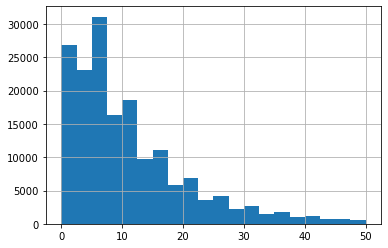

In [6]:
# The Majority of our phrases should be significantly less than 50 words in length,
# So let's view that range
phrase_length.hist(range=(0, 50), bins=20)


In [ ]:
#TODO: Add code to remove phrases less than three words in length and more than say 100?
# Upper limit should be found through distribution so maybe an additional check would be good.

In [16]:
# Quick look at term frequencies

# Define English stopwords
# nltk.download('stopwords')

# We can also define data specific stops to include

hlg_stops = ['like', 'know', 'yeah', 'mean', 'really', 'would','think']
stops = set(stopwords.words('english') + hlg_stops)

# In this case the title of the podcast contains a stop word so we include it in our analysis
stops.remove('how')

# Set a vectorizer and define counts for our most common phrases
cv = CountVectorizer(stop_words=stops)
counts = cv.fit_transform(phrase_dataframe.phrase)
pd.DataFrame(counts.sum(axis=0),columns=cv.get_feature_names()).T.sort_values(0,ascending=False).head(50)


,0
people,7789
get,6436
well,6197
right,5700
kind,5645
one,5483
good,5092
how,4894
oh,4860
gonna,4614


In [17]:
# Check for common bi-grams
cv = CountVectorizer(ngram_range=(2,2), stop_words=stops)
counts = cv.fit_transform(phrase_dataframe.phrase)
pd.DataFrame(counts.sum(axis=0),columns=cv.get_feature_names()).T.sort_values(0,ascending=False).head(50)


,0
new york,1315
little bit,1117
how long,579
lot people,546
oh god,470
long gone,422
every day,373
pretty good,319
how much,312
even though,299


In [18]:
# Check for common tri-grams
cv = CountVectorizer(ngram_range=(3,3), stop_words=stops)
counts = cv.fit_transform(phrase_dataframe.phrase)
pd.DataFrame(counts.sum(axis=0),columns=cv.get_feature_names()).T.sort_values(0,ascending=False).head(100)


,0
how long gone,406
blah blah blah,113
new york times,98
new york city,90
thank joining us,81
...,...
lives new york,13
living new york,13
day every day,13
people lot people,13


In [19]:
# Check for common 4-grams
cv = CountVectorizer(ngram_range=(4,4), stop_words=stops)
counts = cv.fit_transform(phrase_dataframe.phrase)
pd.DataFrame(counts.sum(axis=0),columns=cv.get_feature_names()).T.sort_values(0,ascending=False).head(100)



,0
how long gone radio,30
how many how many,20
how long gone live,19
little bit little bit,17
how much how much,16
...,...
app search how long,4
long gone radio spotify,4
how could how could,4
coming back new york,4


In [11]:
# In this case we see a decline in clarity after 4-grams.
# Tri grams represent the most coherent and specific references